In [339]:
# General Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Baseline Imports
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Random Forest Imports
from sklearn.ensemble import RandomForestRegressor

# Decision Tree Imports
from sklearn.tree import DecisionTreeRegressor

# K-fold Validation Imports
from sklearn.model_selection import KFold, cross_val_score

In [340]:
data = pd.read_csv("crimedata2.csv", encoding="ISO-8859-1")
data = data.replace('?', np.nan)
data = data.dropna(subset=['ViolentCrimesPerPop'])


columns = ['agePct12t29', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'population', 
           'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'medIncome', 
           'medFamInc', 'perCapInc', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'ViolentCrimesPerPop']
df = data[columns].astype(float)
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df

,agePct12t29,PctLess9thGrade,PctNotHSGrad,PctBSorMore,population,racepctblack,racePctWhite,racePctAsian,racePctHisp,medIncome,medFamInc,perCapInc,PctSpeakEnglOnly,PctNotSpeakEnglWell,ViolentCrimesPerPop
0,21.44,5.81,9.90,48.18,11980.0,1.37,91.78,6.50,1.88,75122.0,79584.0,29711.0,85.68,1.37,41.02
1,21.30,5.61,13.72,29.89,23123.0,0.80,95.57,3.44,0.85,47917.0,55323.0,20148.0,87.79,1.81,127.56
2,25.88,2.80,9.09,30.13,29344.0,0.74,94.33,3.43,2.35,35669.0,42112.0,16946.0,93.11,1.14,218.59
3,25.20,11.05,33.68,10.81,16656.0,1.70,97.35,0.50,0.70,20580.0,26501.0,10810.0,94.98,0.56,306.64
5,32.89,8.76,23.03,20.66,140494.0,2.51,95.65,0.90,0.95,21577.0,27705.0,11878.0,96.87,0.60,442.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,30.16,17.12,30.87,15.79,56216.0,6.87,61.68,15.23,29.86,24727.0,27388.0,10237.0,65.33,11.87,545.75
2211,31.23,12.51,27.71,19.28,12251.0,21.18,76.65,1.52,1.29,20321.0,25000.0,9995.0,92.78,0.86,124.10
2212,20.96,7.82,26.14,12.42,32824.0,0.52,92.62,0.98,11.00,27182.0,34973.0,14131.0,88.95,1.70,353.83
2213,30.01,24.37,39.63,12.40,13547.0,3.37,69.91,0.90,62.11,19899.0,22103.0,8100.0,48.92,6.66,691.17


## Baseline

Average ViolentCrimesPerPop: 589.078921765296
Mean Squared Error: 348041.6146645915
Root Mean Squared Error: 589.9505188272924
R-Squared Score: -7.000089035669177e-05


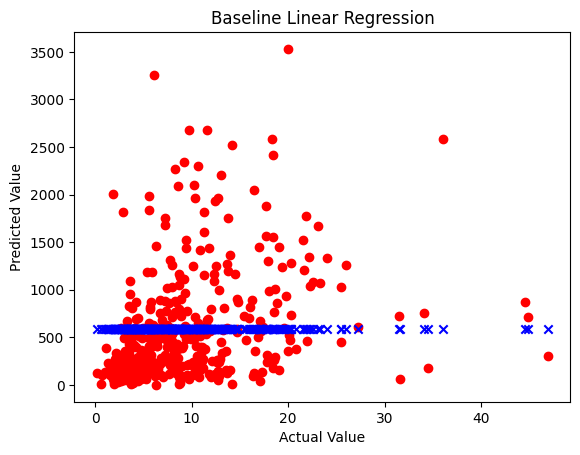

In [341]:
# Calculate Average ViolentCrimesPerPop for baseline
avgViolent = df['ViolentCrimesPerPop'].mean()
print('Average ViolentCrimesPerPop:', avgViolent)

# Add average to the dataset
df['AvgViolentCrimesPerPop'] = avgViolent

# Seperate Predictive and Target
X = df.drop(columns=['ViolentCrimesPerPop', 'AvgViolentCrimesPerPop'])
y = df['ViolentCrimesPerPop']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
baseline = LinearRegression().fit(X_train, y_train)
y_pred = df['AvgViolentCrimesPerPop'][:399] # Not optimal way to do this, but it works (was getting error without specific, CORRECT series length)

# Print Details
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-Squared Score:', r2_score(y_test,y_pred))

# Print graph
# IMPORTANT: X-axis has wrong scale (gonna need to fix, but not currently sure how)
plt.scatter(X_test.iloc[:,1], y_test, color='red')
plt.scatter(X_test.iloc[:,1], y_pred, color='blue', marker='x')
plt.title('Baseline Linear Regression')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

# Remove Average column from dataset to not impact future models
df = df.drop(columns=['AvgViolentCrimesPerPop'])

### Random Forest

Mean Squared Error: 140892.50042845708
Root Mean Squared Error: 375.35649778371635
R-Squared Score: 0.5951565643530312


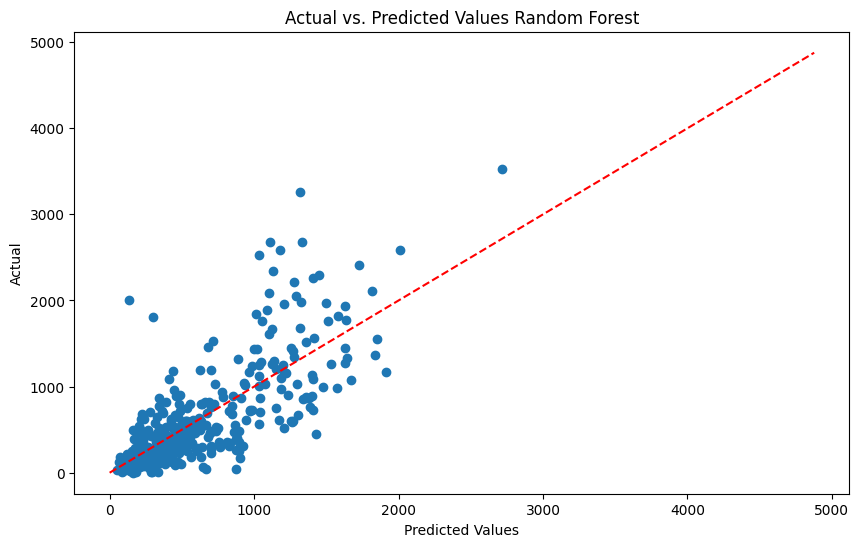

In [342]:
# Random Forest Model
rf = RandomForestRegressor().fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Accuracy Metrics
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-Squared Score:', r2_score(y_test,y_pred))

# Print Graph
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Actual vs. Predicted Values Random Forest')
plt.xlabel('Predicted Values')
plt.ylabel('Actual')
plt.show()

In [343]:
# Cross Validation with K-folds
k_folds = KFold(n_splits = 10)

scores = cross_val_score(rf, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.57680296 0.65865455 0.53899636 0.57855346 0.48393224 0.5910202
 0.6216514  0.62848215 0.50298649 0.49561348]
Average CV Score:  0.5676693287526986
Number of CV Scores used in Average:  10


### Decision Tree

Mean Squared Error: 323651.3658180451
Root Mean Squared Error: 568.9036524913907
R-Squared Score: 0.07001344648471719


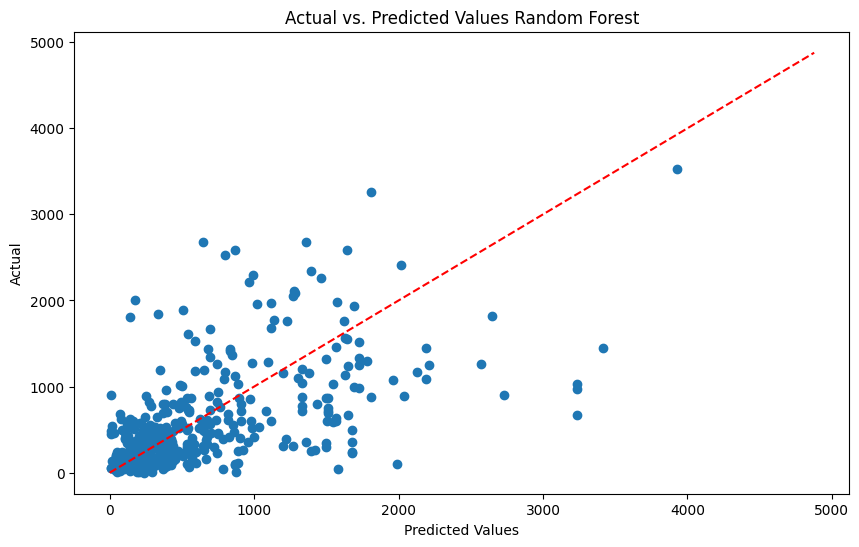

In [344]:
# Decision Tree Model
dt = DecisionTreeRegressor().fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Accuracy Metrics
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-Squared Score:', r2_score(y_test,y_pred))

# Print Graph
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Actual vs. Predicted Values Random Forest')
plt.xlabel('Predicted Values')
plt.ylabel('Actual')
plt.show()

In [345]:
# Cross Validation with K-folds
k_folds = KFold(n_splits = 10)

scores = cross_val_score(rf, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.58442309 0.66893914 0.54914284 0.58679762 0.492015   0.60217106
 0.62650147 0.63231439 0.49334743 0.4984554 ]
Average CV Score:  0.5734107429098863
Number of CV Scores used in Average:  10


### Linear Regression

Mean Squared Error: 159147.6238157988
Root Mean Squared Error: 398.9331069437567
R-Squared Score: 0.5427019138370974


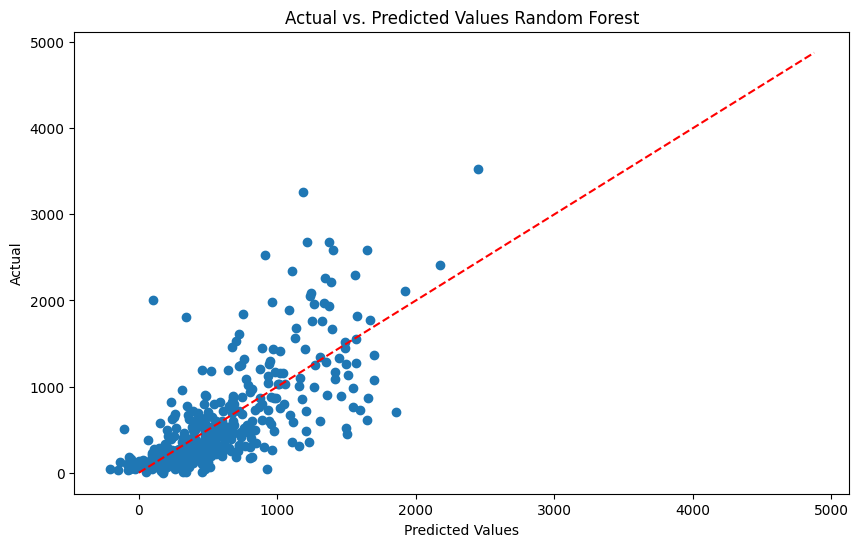

Coefficients: [ 3.42961857e-01 -5.49565014e+01  3.66068386e+01  5.27380507e+00
  2.15152278e-04  1.62727272e+01 -5.46230858e+00  5.35090049e+00
  7.06626188e+00  1.97388490e-03 -2.31407057e-02  3.40772334e-02
  4.61697467e+00  3.28007864e+01]
Intercept: 198.39988220995917


In [346]:
# Linear Regression Model
lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Accuracy Metrics
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-Squared Score:', r2_score(y_test,y_pred))

# Print Graph
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Actual vs. Predicted Values Random Forest')
plt.xlabel('Predicted Values')
plt.ylabel('Actual')
plt.show()

# Print Calculation Details
# Would like to include variable name with Coefficients
print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)

In [347]:
# Cross Validation with K-folds
k_folds = KFold(n_splits = 10)

scores = cross_val_score(rf, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.57950919 0.67338976 0.55538069 0.58056025 0.48065593 0.61812498
 0.6294359  0.65246448 0.50970916 0.48617825]
Average CV Score:  0.5765408576315472
Number of CV Scores used in Average:  10


## Classification

In [348]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

catData = df
# effectively binning the violent crimes per population into x bins based on the distribution
n = catData['ViolentCrimesPerPop'].quantile([0, 0.33, 0.66, 1]).values
binLabels = ['low', 'medium', 'high']

catData['ViolentCrimesCat'] = pd.cut(catData['ViolentCrimesPerPop'], bins=n, labels = binLabels)
# drop 'nan' from the new categorical column
catData = catData.dropna(subset=['ViolentCrimesCat'])
catData['ViolentCrimesCat'].value_counts()
catData['ViolentCrimesCat'] = catData['ViolentCrimesCat'].astype(str)
X = catData.drop(columns=['ViolentCrimesPerPop', 'ViolentCrimesCat'])
y = catData['ViolentCrimesCat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# print bin counts
print(catData['ViolentCrimesCat'].value_counts())

ViolentCrimesCat
high      678
medium    658
low       657
Name: count, dtype: int64


/var/folders/zp/xzl97jrj4bgfcnnjjm_hk2dc0000gn/T/ipykernel_48686/3413479052.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catData['ViolentCrimesCat'] = catData['ViolentCrimesCat'].astype(str)


## DT

In [349]:
# deciesion tree regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error

# Train the model and fit to test data
dt_cart = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = dt_cart.predict(X_test)

### Cross Validation

In [350]:
k = 5
cv_scores = cross_val_score(dt_cart, X, y, cv=k, scoring='accuracy')
print(f"Cross-Validation Scores for each fold: {cv_scores}")
print(f"Average Cross-Validation Score: {np.mean(cv_scores)}")

Cross-Validation Scores for each fold: [0.60401003 0.57393484 0.57142857 0.57537688 0.56532663]
Average Cross-Validation Score: 0.5780153902343799


### Metrics

In [351]:
# Evaluate model performance on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, dt_cart.predict_proba(X_test), multi_class='ovr')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC-AUC: {roc_auc}")

Accuracy: 0.556390977443609
Precision: 0.5526160493296278
Recall: 0.556390977443609
F1-Score: 0.55397006051889
ROC-AUC: 0.6701716553176897


## RF

In [352]:
# random forest regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

# Train the model and fit to test data
rf = RandomForestClassifier().fit(X_train, y_train)
y_pred = rf.predict(X_test)

### Cross Validation

In [353]:
k = 10
cv_scores = cross_val_score(rf, X, y, cv=k, scoring='accuracy')
print(f"Cross-Validation Scores for each fold: {cv_scores}")
print(f"Average Cross-Validation Score: {np.mean(cv_scores)}")

Cross-Validation Scores for each fold: [0.655      0.73       0.675      0.69346734 0.64824121 0.70351759
 0.74874372 0.66834171 0.6281407  0.66331658]
Average Cross-Validation Score: 0.6813768844221105


### Metrics

In [354]:
# Evaluate model performance on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test), multi_class='ovr')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC-AUC: {roc_auc}")

Accuracy: 0.7017543859649122
Precision: 0.6982604594378807
Recall: 0.7017543859649122
F1-Score: 0.694998234370973
ROC-AUC: 0.8616679240353369


## Naive Bayes

In [355]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)

### Cross Validation

In [356]:
k = 10
cv_scores = cross_val_score(nb_classifier, X, y, cv=k, scoring='accuracy')
print(f"Cross-Validation Scores for each fold: {cv_scores}")
print(f"Average Cross-Validation Score: {np.mean(cv_scores)}")

Cross-Validation Scores for each fold: [0.625      0.59       0.61       0.64321608 0.5879397  0.59296482
 0.65326633 0.57286432 0.60301508 0.58291457]
Average Cross-Validation Score: 0.6061180904522614


### Metrics

In [357]:
# Evaluate model performance on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, nb_classifier.predict_proba(X_test), multi_class='ovr')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC-AUC: {roc_auc}")

Accuracy: 0.606516290726817
Precision: 0.6253368147965012
Recall: 0.606516290726817
F1-Score: 0.5894405106225276
ROC-AUC: 0.8115762830875749


## Gradient Boost

In [358]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_classifier.fit(X_train, y_train)
y_pred_gb = gb_classifier.predict(X_test)

### Cross Validation

In [359]:
k = 5
cv_scores = cross_val_score(gb_classifier, X, y, cv=k, scoring='accuracy')
print(f"Cross-Validation Scores for each fold: {cv_scores}")
print(f"Average Cross-Validation Score: {np.mean(cv_scores)}")

Cross-Validation Scores for each fold: [0.69172932 0.66917293 0.68170426 0.72864322 0.62060302]
Average Cross-Validation Score: 0.6783705494893011


### Metrics

In [360]:
accuracy = accuracy_score(y_test, y_pred_gb)
precision = precision_score(y_test, y_pred_gb, average='weighted')
recall = recall_score(y_test, y_pred_gb, average='weighted')
f1 = f1_score(y_test, y_pred_gb, average='weighted')
roc_auc = roc_auc_score(y_test, gb_classifier.predict_proba(X_test), multi_class='ovr')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC-AUC: {roc_auc}")

Accuracy: 0.681704260651629
Precision: 0.6771745350308546
Recall: 0.681704260651629
F1-Score: 0.6777852033000794
ROC-AUC: 0.8584217247179086


### NOTES

- With the classification models, I binned the violent crimes column into small medium and large. Im not sure that the binning is accurate enough for the dataset and we should look to more specificaly tune bin sizes.
- I think that overall the classification models are more accurate than the regression models but that could be due to the bins. 
- Looking at the classification models Random forest performed the best with the best performance in crossvalidation and in general accuracy scores.
- the next best model seemed to be gradient boost, it performed about as well as random forest in cross validation but had slightly lower accuracy and other metrics
- Decisicion tress was the opposite with lower cross validation scores but better accuracy and precision metrics


## K-means

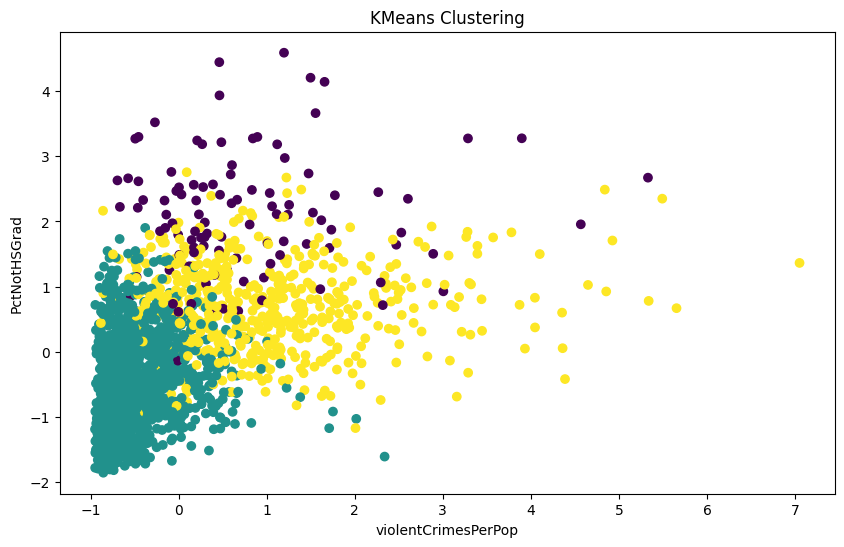

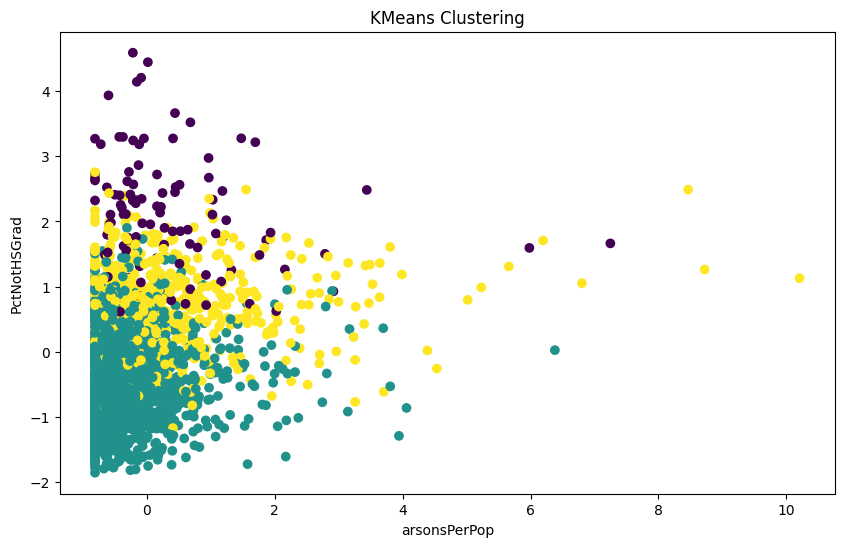

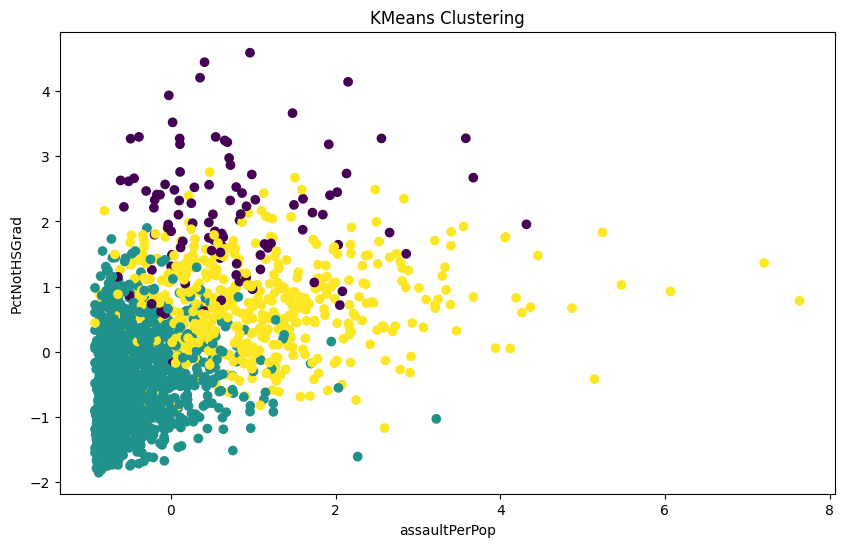

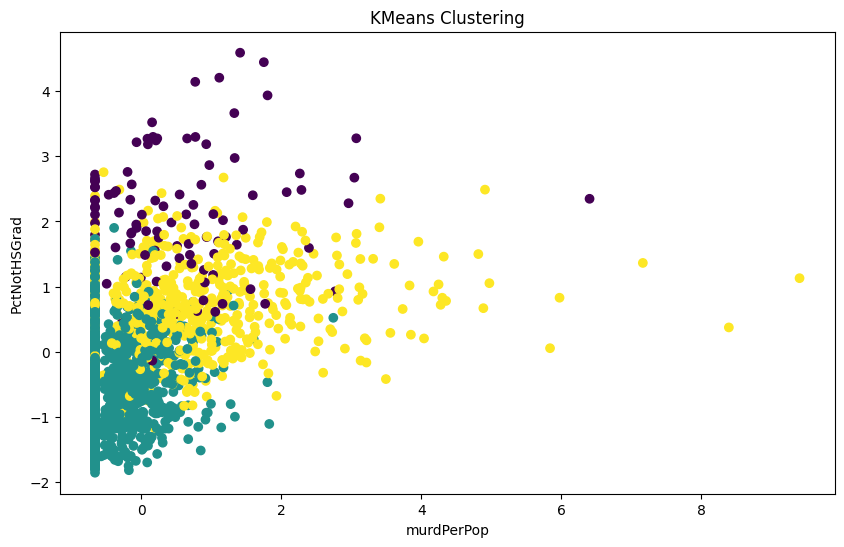

Cluster Centers:
[[3.10461538e+01 2.78132692e+01 4.58620192e+01 1.09561538e+01
  9.47724904e+04 5.34980769e+00 6.05789423e+01 5.59711538e+00
  6.08800000e+01 2.51907308e+04 2.75087885e+04 9.66486538e+03
  3.88267308e+01 1.77143269e+01 1.05957615e+03 4.70669231e+01
  6.59315865e+02 1.09433654e+01]
 [2.70200386e+01 6.60635802e+00 1.77204090e+01 2.64788657e+01
  3.16304622e+04 3.66732253e+00 9.12093133e+01 2.93228395e+00
  4.59101080e+00 3.85670532e+04 4.49084861e+04 1.74920285e+04
  8.93709954e+01 1.53558642e+00 2.94718549e+02 2.26872917e+01
  1.90789128e+02 2.25775463e+00]
 [2.83756016e+01 1.29922288e+01 3.06824063e+01 1.65921696e+01
  9.71842702e+04 2.47962327e+01 6.82150296e+01 1.95380671e+00
  8.72400394e+00 2.38439132e+04 2.90125641e+04 1.19429704e+04
  8.79998817e+01 2.26921105e+00 1.22970085e+03 5.31394083e+01
  7.90606529e+02 1.44185010e+01]]


In [361]:
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("crimedata2.csv", encoding="ISO-8859-1")
data = data.replace('?', np.nan)
data = data.dropna(subset=['ViolentCrimesPerPop', 'arsonsPerPop', 'assaultPerPop', 'murdPerPop'])


columns = ['agePct12t29', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'population', 'racepctblack', 
           'racePctWhite', 'racePctAsian', 'racePctHisp', 'medIncome', 'medFamInc', 'perCapInc', 'PctSpeakEnglOnly', 
           'PctNotSpeakEnglWell', 'ViolentCrimesPerPop', 'arsonsPerPop', 'assaultPerPop', 'murdPerPop']
df = data[columns].astype(float)
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df

X = df

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)

data['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 14], X_scaled[:, 2], c=kmeans.labels_, cmap='viridis')
plt.xlabel('violentCrimesPerPop')
plt.ylabel('PctNotHSGrad')
plt.title('KMeans Clustering')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 15], X_scaled[:, 2], c=kmeans.labels_, cmap='viridis')
plt.xlabel('arsonsPerPop')
plt.ylabel('PctNotHSGrad')
plt.title('KMeans Clustering')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 16], X_scaled[:, 2], c=kmeans.labels_, cmap='viridis')
plt.xlabel('assaultPerPop')
plt.ylabel('PctNotHSGrad')
plt.title('KMeans Clustering')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 17], X_scaled[:, 2], c=kmeans.labels_, cmap='viridis')
plt.xlabel('murdPerPop')
plt.ylabel('PctNotHSGrad')
plt.title('KMeans Clustering')
plt.show()

print("Cluster Centers:")
print(scaler.inverse_transform(kmeans.cluster_centers_))

## Optimization of the Models

In [362]:
# data = pd.read_csv("crimedata2.csv", encoding="ISO-8859-1")
# data = data.replace('?', np.nan)
# data = data.dropna(subset=['ViolentCrimesPerPop', 'arsonsPerPop', 'assaultPerPop', 'murdPerPop'])

# columns = ['agePct12t29', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'population', 'racepctblack',
#               'racePctWhite', 'racePctAsian', 'racePctHisp', 'medIncome', 'medFamInc', 'perCapInc', 'PctSpeakEnglOnly',
#               'PctNotSpeakEnglWell', 'ViolentCrimesPerPop', 'arsonsPerPop', 'assaultPerPop', 'murdPerPop']
# df = data[columns].astype(float)
# for col in df.columns:
#     df[col] = pd.to_numeric(df[col], errors='coerce')

# df.rename(columns = {'racepctblack':'racePctBlack'}, inplace = True)

# # make column that takes all of the race columns and states the majority race
# df['MajorityRace'] = df[['racePctBlack', 'racePctWhite', 'racePctAsian', 'racePctHisp']].idxmax(axis=1)

# df['MajorityRace'] = df['MajorityRace'].apply(lambda x: x.replace('racePct', '').lower())
# df = pd.get_dummies(df, columns=['MajorityRace'], dtype=int)

## Regression

Mean Squared Error: 170510.3132565002
Root Mean Squared Error: 412.92894456128914
R-Squared Score: 0.5751523484873188


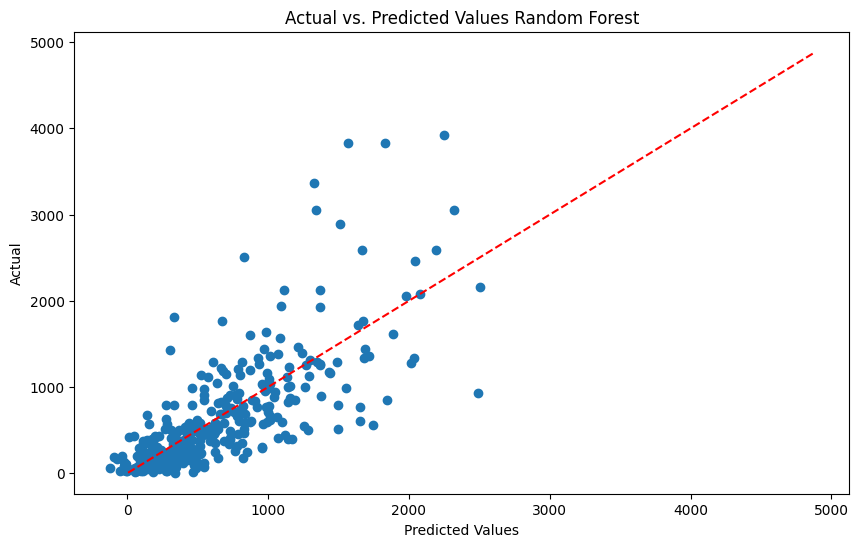

In [363]:
# Linear regression model with new columns above
# X = df.drop(columns=['ViolentCrimesPerPop', 'arsonsPerPop', 'assaultPerPop', 'murdPerPop', 'racePctBlack',
#               'racePctWhite', 'racePctAsian', 'racePctHisp'])
X = df.drop(columns=['ViolentCrimesPerPop', 'arsonsPerPop', 'assaultPerPop', 'murdPerPop'])
y = df['ViolentCrimesPerPop']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-Squared Score:', r2_score(y_test,y_pred))

# plots of the new model
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Actual vs. Predicted Values Random Forest')
plt.xlabel('Predicted Values')
plt.ylabel('Actual')
plt.show()

Mean Squared Error: 173451.6898142259
Root Mean Squared Error: 416.4753171728499
R-Squared Score: 0.5678235429804965


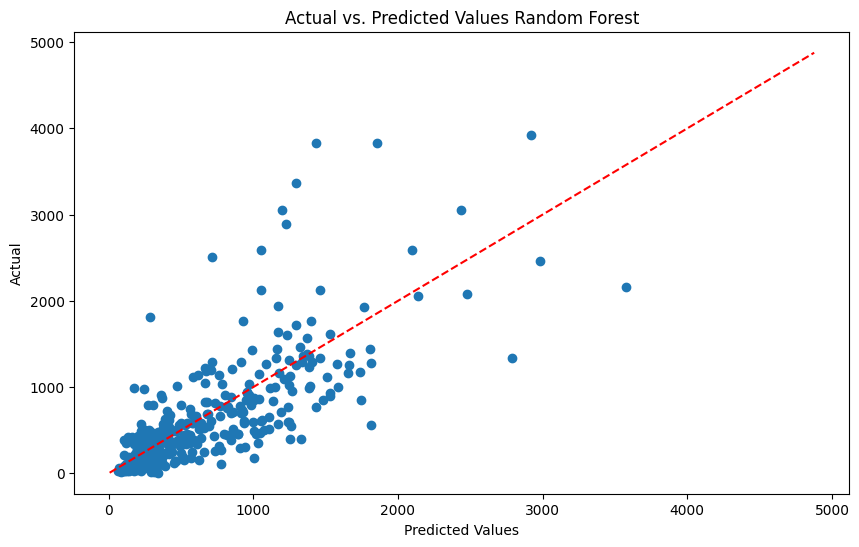

In [364]:
# random forest model with
rf = RandomForestRegressor().fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-Squared Score:', r2_score(y_test,y_pred))

# plots of the new model
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Actual vs. Predicted Values Random Forest')
plt.xlabel('Predicted Values')
plt.ylabel('Actual')
plt.show()

Mean Squared Error: 431618.757616754
Root Mean Squared Error: 656.9769840844914
R-Squared Score: -0.07543181418270373


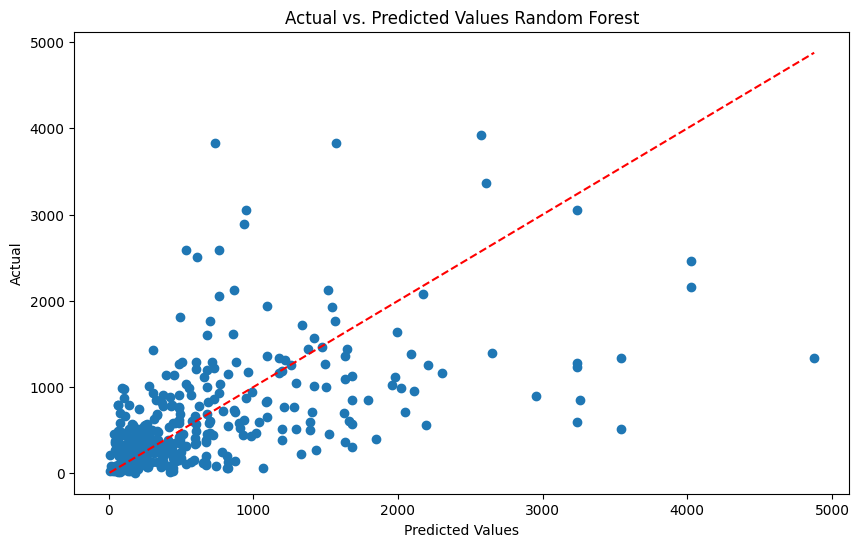

In [365]:
# decision tree model
dt = DecisionTreeRegressor().fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-Squared Score:', r2_score(y_test,y_pred))

# plots of the new model
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Actual vs. Predicted Values Random Forest')
plt.xlabel('Predicted Values')
plt.ylabel('Actual')
plt.show()

In [366]:
# # Import necessary libraries for hyperparameter tuning
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# from sklearn.linear_model import Ridge, Lasso
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.naive_bayes import GaussianNB
# from sklearn.metrics import mean_squared_error, r2_score

# # Define parameter grids for each model
# ridge_params = {'alpha': [0.1, 1.0, 10.0, 100.0]}
# lasso_params = {'alpha': [0.1, 1.0, 10.0, 100.0]}
# dt_params = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 10, 20], 'min_samples_leaf': [1, 5, 10]}
# rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'max_features': ['auto', 'sqrt', 'log2']}
# lr_params = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
# gb_params = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
# # nb_params = {'var_smoothing': [1e-9, 1e-8, 1e-7]}

# # Initialize models
# ridge = Ridge()
# lasso = Lasso()
# dt = DecisionTreeRegressor()
# rf = RandomForestRegressor()
# lr = LinearRegression()
# gb = GradientBoostingRegressor()
# # nb = GaussianNB()

# # Perform Grid Search for each model
# ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
# lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error')
# dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='neg_mean_squared_error')
# rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='neg_mean_squared_error')
# gb_grid = GridSearchCV(gb, gb_params, cv=5, scoring='neg_mean_squared_error')
# # nb_grid = GridSearchCV(nb, nb_params, cv=5, scoring='neg_mean_squared_error')

# # Fit models
# ridge_grid.fit(X_train, y_train)
# lasso_grid.fit(X_train, y_train)
# dt_grid.fit(X_train, y_train)
# rf_grid.fit(X_train, y_train)
# gb_grid.fit(X_train, y_train)
# # nb_grid.fit(X_train, y_train)

# # Get best models
# best_ridge = ridge_grid.best_estimator_
# best_lasso = lasso_grid.best_estimator_
# best_dt = dt_grid.best_estimator_
# best_rf = rf_grid.best_estimator_
# best_gb = gb_grid.best_estimator_
# # best_nb = nb_grid.best_estimator_

# # Evaluate models
# # models = {'Ridge': best_ridge, 'Lasso': best_lasso, 'Decision Tree': best_dt, 'Random Forest': best_rf, 'Gradient Boosting': best_gb, 'Naive Bayes': best_nb}
# models = {'Ridge': best_ridge, 'Lasso': best_lasso, 'Decision Tree': best_dt, 'Random Forest': best_rf, 'Gradient Boosting': best_gb}

# for name, model in models.items():
#     y_pred = model.predict(X_test)
#     mse = mean_squared_error(y_test, y_pred)
#     rmse = np.sqrt(mse)
#     r2 = r2_score(y_test, y_pred)
#     print(f'{name} - MSE: {mse}, RMSE: {rmse}, R2: {r2}')

## Classification

In [367]:
data = pd.read_csv("crimedata2.csv", encoding="ISO-8859-1")
data = data.replace('?', np.nan)
data = data.dropna(subset=['ViolentCrimesPerPop'])

columns = ['agePct12t29', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'population', 'racepctblack',
              'racePctWhite', 'racePctAsian', 'racePctHisp', 'medIncome', 'medFamInc', 'perCapInc', 'PctSpeakEnglOnly',
              'PctNotSpeakEnglWell', 'ViolentCrimesPerPop']
df = data[columns].astype(float)
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df

print(df.ViolentCrimesPerPop.isna().sum())

0


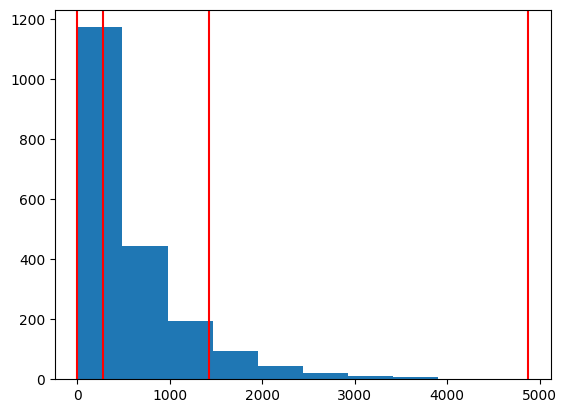

ViolentCrimesCat
medium    996
low       797
high      200
Name: count, dtype: int64


/var/folders/zp/xzl97jrj4bgfcnnjjm_hk2dc0000gn/T/ipykernel_48686/155650578.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catData['ViolentCrimesCat'] = catData['ViolentCrimesCat'].astype(str)


In [368]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

catData = df
# effectively binning the violent crimes per population into x bins based on the distribution
n = catData['ViolentCrimesPerPop'].quantile([0, .4, 0.9, 1]).values

# plot the histogram of the target variable with the bins color coded
plt.hist(catData['ViolentCrimesPerPop'])
for i in n:
    plt.axvline(i, color='r')
plt.show()


binLabels = ['low', 'medium', 'high']

catData['ViolentCrimesCat'] = pd.cut(catData['ViolentCrimesPerPop'], bins=n, labels = binLabels)
# drop 'nan' from the new categorical column
catData = catData.dropna(subset=['ViolentCrimesCat'])
catData['ViolentCrimesCat'].value_counts()
catData['ViolentCrimesCat'] = catData['ViolentCrimesCat'].astype(str)
X = catData.drop(columns=['ViolentCrimesPerPop', 'ViolentCrimesCat'])
y = catData['ViolentCrimesCat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# print bin counts
print(catData['ViolentCrimesCat'].value_counts())

Cross-Validation Scores for each fold: [0.715      0.755      0.72       0.70351759 0.77386935 0.76884422
 0.79899497 0.73869347 0.68844221 0.71356784]
Average Cross-Validation Score: 0.7375929648241206
Accuracy: 0.7393483709273183
Precision: 0.735986217848963
Recall: 0.7393483709273183
F1-Score: 0.7225833051538227
ROC-AUC: 0.8467911362158773


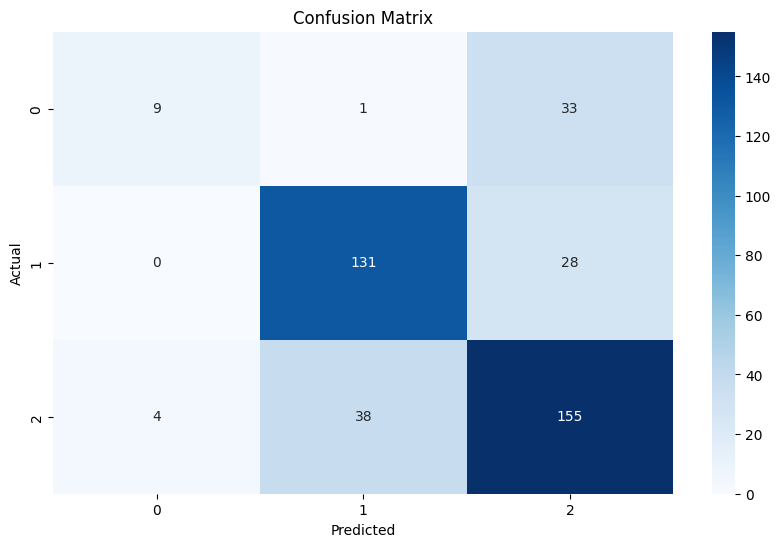

In [369]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(X_train, y_train)
y_pred = rf.predict(X_test)

k = 10
cv_scores = cross_val_score(rf, X, y, cv=k, scoring='accuracy')
print(f"Cross-Validation Scores for each fold: {cv_scores}")
print(f"Average Cross-Validation Score: {np.mean(cv_scores)}")

# Evaluate model performance on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test), multi_class='ovo')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC-AUC: {roc_auc}")

from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.6265664160401002
Precision: 0.6244863883684272
Recall: 0.6265664160401002
F1-Score: 0.6254478836804197
ROC-AUC: 0.6661782564827571


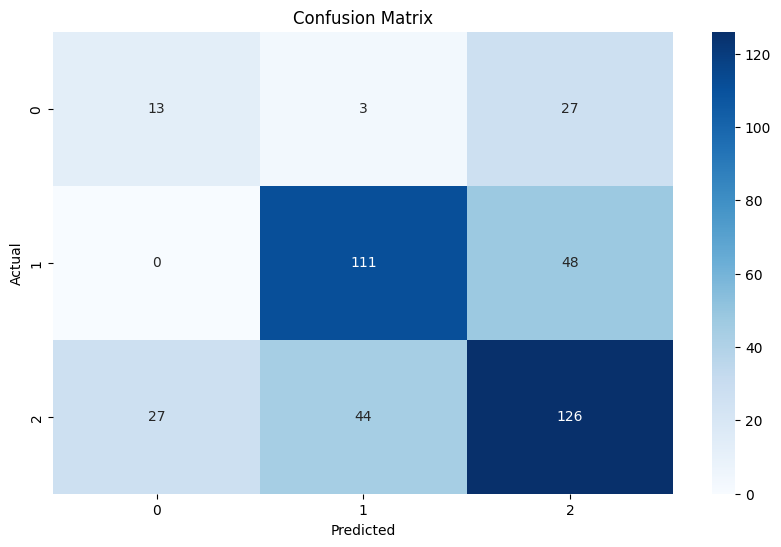

In [370]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, dt.predict_proba(X_test), multi_class='ovr')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC-AUC: {roc_auc}")

# Plot the decision tree classification outputs, maybe a confusino matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.6491228070175439
Precision: 0.6965921568528738
Recall: 0.6491228070175439
F1-Score: 0.629309532987351
ROC-AUC: 0.8311069829166934


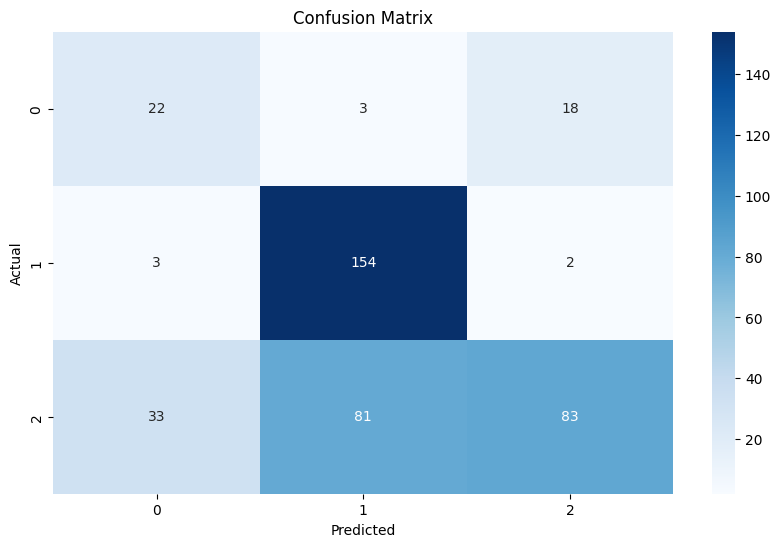

In [371]:
# navie bayes classifier
from sklearn.naive_bayes import GaussianNB

# improve the model
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, nb_classifier.predict_proba(X_test), multi_class='ovr')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC-AUC: {roc_auc}")

from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.706766917293233
Precision: 0.7374714972139574
Recall: 0.706766917293233
F1-Score: 0.6764448461837681
ROC-AUC: 0.8522400056435232


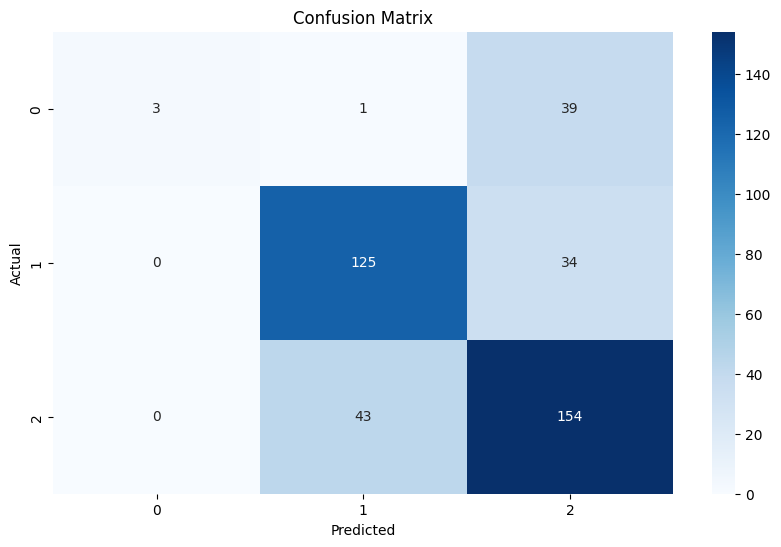

In [372]:
# other classifiers 
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(n_estimators=200, learning_rate=0.01, max_depth=1)
gb_classifier.fit(X_train, y_train)
y_pred = gb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') 
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, gb_classifier.predict_proba(X_test), multi_class='ovr')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC-AUC: {roc_auc}")

from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Parameter tuning

In [373]:
# # hyperparameter tuning for classification models above
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# from sklearn.linear_model import Ridge, Lasso
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.naive_bayes import GaussianNB

# # Define parameter grids for each model
# dt_params = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 10, 20], 'min_samples_leaf': [1, 5, 10]}
# rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'max_features': ['auto', 'sqrt', 'log2']}
# gb_params = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
# nb_params = {'var_smoothing': [1e-9, 1e-8, 1e-7]}
# # Initialize models
# dt = DecisionTreeClassifier()
# rf = RandomForestClassifier()
# gb = GradientBoostingClassifier()
# nb = GaussianNB()

# # Perform Grid Search for each model
# dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='accuracy')
# rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy')
# gb_grid = GridSearchCV(gb, gb_params, cv=5, scoring='accuracy')
# nb_grid = GridSearchCV(nb, nb_params, cv=5, scoring='accuracy')

# # Fit models
# dt_grid.fit(X_train, y_train)
# rf_grid.fit(X_train, y_train)
# gb_grid.fit(X_train, y_train)
# nb_grid.fit(X_train, y_train)

# # Get best models
# best_dt = dt_grid.best_estimator_
# best_rf = rf_grid.best_estimator_
# best_gb = gb_grid.best_estimator_
# best_nb = nb_grid.best_estimator_

# # Evaluate models
# models = {'Decision Tree': best_dt, 'Random Forest': best_rf, 'Gradient Boosting': best_gb, 'Naive Bayes': best_nb}

In [374]:
# # print models and their scores
# for name, model in models.items():
#     y_pred = model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred, average='weighted')
#     recall = recall_score(y_test, y_pred, average='weighted')
#     f1 = f1_score(y_test, y_pred, average='weighted')
#     print(f'{name} - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}')